In [1]:
from requests import Request, Session
import pandas as pd
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os
from time import time
from time import sleep

In [2]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'bbcce731-97ed-4957-891b-0a3460b7e250',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [3]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\Joan\AppData\Local\Temp\ipykernel_3732\644439384.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9784,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.918344e+07,1.918344e+07,...,39.8464,4.027497e+11,None,2022-10-19T11:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-19 11:22:40.761579
1,1027,Ethereum,ETH,ethereum,6141,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,...,17.1753,1.586538e+11,None,2022-10-19T11:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-19 11:22:40.761579
2,825,Tether,USDT,tether,40977,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.845256e+10,7.014613e+10,...,7.4143,7.015166e+10,None,2022-10-19T11:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-19 11:22:40.761579
3,3408,USD Coin,USDC,usd-coin,6554,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.459229e+10,4.459229e+10,...,4.8295,4.459225e+10,None,2022-10-19T11:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-19 11:22:40.761579
4,1839,BNB,BNB,bnb,1126,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.610017e+08,1.610017e+08,...,4.7191,5.415120e+10,None,2022-10-19T11:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-19 11:22:40.761579
5,52,XRP,XRP,xrp,827,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,4.988702e+10,9.998926e+10,...,2.4549,4.545290e+10,None,2022-10-19T11:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-19 11:22:40.761579
6,4687,Binance USD,BUSD,binance-usd,5307,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.162810e+10,2.162810e+10,...,2.3415,2.161934e+10,None,2022-10-19T11:20:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-10-19 11:22:40.761579
7,2010,Cardano,ADA,cardano,582,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.429204e+10,3.504502e+10,...,1.3177,1.597753e+10,None,2022-10-19T11:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-19 11:22:40.761579
8,5426,Solana,SOL,solana,391,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.581142e+08,5.116169e+08,...,1.1591,1.528985e+10,None,2022-10-19T11:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-19 11:22:40.761579
9,74,Dogecoin,DOGE,dogecoin,576,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,...,0.8477,7.830604e+09,None,2022-10-19T11:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-19 11:22:40.761579


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'bbcce731-97ed-4957-891b-0a3460b7e250',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now')
    df
    if not os.path.isfile(r'C:\xampp\htdocs\Data Visualization Project\API.csv'):
        df.to_csv(r'C:\xampp\htdocs\Data Visualization Project\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\xampp\htdocs\Data Visualization Project\API.csv', mode = 'a', header=False)

In [6]:
for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(86400)
exit()

C:\Users\Joan\AppData\Local\Temp\ipykernel_3732\2990926178.py:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['Timestamp'] = pd.to_datetime('now')


API Runner completed


C:\Users\Joan\AppData\Local\Temp\ipykernel_3732\2990926178.py:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['Timestamp'] = pd.to_datetime('now')


API Runner completed


KeyboardInterrupt: 

In [7]:
df2 = pd.read_csv(r'C:\xampp\htdocs\Data Visualization Project\API.csv')
df2

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,9777,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.917773e+07,1.917773e+07,NaN,1,NaN,NaN,NaN,2022-10-13T06:52:00.000Z,19079.316759,2.488550e+10,-9.0655,-0.106441,-0.421920,-5.732348,-14.447739,-22.538274,-7.403042,3.658980e+11,40.1629,4.006657e+11,NaN,2022-10-13T06:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-13 06:54:19.327938
1,1,1027,Ethereum,ETH,ethereum,6138,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.227737e+08,1.227737e+08,NaN,2,NaN,NaN,NaN,2022-10-13T06:52:00.000Z,1285.384265,8.548095e+09,2.2917,-0.192258,-0.950970,-6.000281,-24.730457,-35.434260,7.260188,1.578114e+11,17.3216,1.578114e+11,NaN,2022-10-13T06:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-13 06:54:19.327938
2,2,825,Tether,USDT,tether,40734,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,6.842186e+10,7.014613e+10,NaN,3,NaN,NaN,NaN,2022-10-13T06:52:00.000Z,0.999993,3.427894e+10,-3.7375,-0.005794,0.005620,-0.012066,-0.018606,-0.025520,0.041860,6.842141e+10,7.5100,7.014567e+10,NaN,2022-10-13T06:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-13 06:54:19.327938
3,3,3408,USD Coin,USDC,usd-coin,6492,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.580845e+10,4.580845e+10,NaN,4,NaN,NaN,NaN,2022-10-13T06:52:00.000Z,1.000008,2.991949e+09,-10.6888,0.006288,-0.001180,0.004956,0.007773,0.004015,0.002570,4.580881e+10,5.0282,4.580881e+10,NaN,2022-10-13T06:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-13 06:54:19.327938
4,4,1839,BNB,BNB,bnb,1126,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,NaN,2022-10-13T06:52:00.000Z,266.841283,5.811835e+08,0.3771,-1.040407,-2.099516,-9.511668,-8.739662,-18.951937,12.258636,4.305144e+10,4.7254,5.336826e+10,NaN,2022-10-13T06:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-13 06:54:19.327938
5,5,52,XRP,XRP,xrp,827,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,4.996418e+10,9.998927e+10,NaN,6,NaN,NaN,NaN,2022-10-13T06:52:00.000Z,0.462480,1.611794e+09,-19.6107,-2.103881,-5.863099,-7.291490,30.151926,20.045196,37.278831,2.310745e+10,2.5357,4.624803e+10,NaN,2022-10-13T06:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-13 06:54:19.327938
6,6,4687,Binance USD,BUSD,binance-usd,5263,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,2.162810e+10,2.162810e+10,NaN,7,NaN,NaN,NaN,2022-10-13T06:52:00.000Z,1.000126,5.305489e+09,-11.6019,0.006987,-0.007841,0.043509,-0.003004,0.026034,0.020130,2.163083e+10,2.3741,2.163083e+10,NaN,2022-10-13T06:52:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-10-13 06:54:19.327938
7,7,2010,Cardano,ADA,cardano,580,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.427905e+10,3.502610e+10,NaN,8,NaN,NaN,NaN,2022-10-13T06:52:00.000Z,0.368736,5.831505e+08,22.3831,-1.328995,-6.445995,-14.808802,-26.334041,-37.028334,-16.295246,1.263991e+10,1.3873,1.659311e+10,NaN,2022-10-13T06:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-13 06:54:19.327938
8,8,5426,Solana,SOL,solana,389,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,3.577355e+08,5.11616

In [8]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [9]:
df2

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,9777,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19177731.00000,19177731.00000,NaN,1,NaN,NaN,NaN,2022-10-13T06:52:00.000Z,19079.31676,24885503908.50291,-9.06550,-0.10644,-0.42192,-5.73235,-14.44774,-22.53827,-7.40304,365898004458.95709,40.16290,400665651929.21002,NaN,2022-10-13T06:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-13 06:54:19.327938
1,1,1027,Ethereum,ETH,ethereum,6138,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122773713.49900,122773713.49900,NaN,2,NaN,NaN,NaN,2022-10-13T06:52:00.000Z,1285.38427,8548095324.75217,2.29170,-0.19226,-0.95097,-6.00028,-24.73046,-35.43426,7.26019,157811399513.27875,17.32160,157811399513.28000,NaN,2022-10-13T06:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-13 06:54:19.327938
2,2,825,Tether,USDT,tether,40734,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,68421859091.16577,70146125804.35068,NaN,3,NaN,NaN,NaN,2022-10-13T06:52:00.000Z,0.99999,34278940160.15028,-3.73750,-0.00579,0.00562,-0.01207,-0.01861,-0.02552,0.04186,68421414284.39124,7.51000,70145669788.21001,NaN,2022-10-13T06:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-13 06:54:19.327938
3,3,3408,USD Coin,USDC,usd-coin,6492,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,45808448972.94941,45808448972.94941,NaN,4,NaN,NaN,NaN,2022-10-13T06:52:00.000Z,1.00001,2991948902.79145,-10.68880,0.00629,-0.00118,0.00496,0.00777,0.00402,0.00257,45808805291.65618,5.02820,45808805291.66000,NaN,2022-10-13T06:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-13 06:54:19.327938
4,4,1839,BNB,BNB,bnb,1126,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,NaN,2022-10-13T06:52:00.000Z,266.84128,581183463.98298,0.37710,-1.04041,-2.09952,-9.51167,-8.73966,-18.95194,12.25864,43051441763.17857,4.72540,53368256622.58000,NaN,2022-10-13T06:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-13 06:54:19.327938
5,5,52,XRP,XRP,xrp,827,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,49964184162.00000,99989267435.00000,NaN,6,NaN,NaN,NaN,2022-10-13T06:52:00.000Z,0.46248,1611794374.56699,-19.61070,-2.10388,-5.86310,-7.29149,30.15193,20.04520,37.27883,23107449183.94944,2.53570,46248026604.47000,NaN,2022-10-13T06:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-13 06:54:19.327938
6,6,4687,Binance USD,BUSD,binance-usd,5263,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,21628100610.95000,21628100610.95000,NaN,7,NaN,NaN,NaN,2022-10-13T06:52:00.000Z,1.00013,5305488637.06119,-11.60190,0.00699,-0.00784,0.04351,-0.00300,0.02603,0.02013,21630825993.52425,2.37410,21630825993.52000,NaN,2022-10-13T06:52:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-10-13 06:54:19.327938
7,7,2010,Cardano,ADA,cardano,580,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34279052983.36100,35026102954.65500,NaN,8,NaN,NaN,NaN,2022-10-13T06:52:00.000Z,0.36874,583150513.97839,22.38310,-1.32899,-6.44600,-14.80880,-26.33404,-37.02833,-16.29525,12639909974.74852,1.38730,16593105682.93000,NaN,2022-10-13T06:52:00.000Z,NaN,NaN,N

In [10]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.45624,-1.90527,0.13477,2.58873,-9.73569,-15.76555
Ethereum,-0.74125,-2.27494,-0.39216,-1.05855,-20.64625,-13.17133
Tether,-0.00570,-0.00668,0.00618,0.00037,-0.00074,0.00648
USD Coin,0.00257,-0.00970,-0.00595,-0.00120,-0.01141,-0.02829
BNB,-0.47695,-0.97277,-0.45822,3.21453,-5.99704,5.83989
XRP,-0.92710,-3.06085,-7.02183,29.66234,32.97303,28.49581
Binance USD,-0.08360,-0.07436,-0.03553,-0.08047,-0.07936,-0.05441
Cardano,-1.02767,-3.50776,-9.96395,-19.20619,-22.88262,-26.65908
Solana,-0.79531,-3.08201,-4.60511,-4.21034,-18.58654,-27.12497


In [11]:
df4 =df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.45624
             quote.USD.percent_change_24h    -1.90527
             quote.USD.percent_change_7d      0.13477
             quote.USD.percent_change_30d     2.58873
             quote.USD.percent_change_60d    -9.73569
             quote.USD.percent_change_90d   -15.76555
Ethereum     quote.USD.percent_change_1h     -0.74125
             quote.USD.percent_change_24h    -2.27494
             quote.USD.percent_change_7d     -0.39216
             quote.USD.percent_change_30d    -1.05855
             quote.USD.percent_change_60d   -20.64625
             quote.USD.percent_change_90d   -13.17133
Tether       quote.USD.percent_change_1h     -0.00570
             quote.USD.percent_change_24h    -0.00668
             quote.USD.percent_change_7d      0.00618
             quote.USD.percent_change_30d     0.00037
             quote.USD.percent_change_60d    -0.00074
             quote.USD.percent_change_90

In [12]:
type(df4)

pandas.core.series.Series

In [13]:
df4 = df4.to_frame(name='values')

In [14]:
df4 = df4.reset_index()
df4

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.45624
1,Bitcoin,quote.USD.percent_change_24h,-1.90527
2,Bitcoin,quote.USD.percent_change_7d,0.13477
3,Bitcoin,quote.USD.percent_change_30d,2.58873
4,Bitcoin,quote.USD.percent_change_60d,-9.73569
5,Bitcoin,quote.USD.percent_change_90d,-15.76555
6,Ethereum,quote.USD.percent_change_1h,-0.74125
7,Ethereum,quote.USD.percent_change_24h,-2.27494
8,Ethereum,quote.USD.percent_change_7d,-0.39216
9,Ethereum,quote.USD.percent_change_30d,-1.05855


In [15]:
df4 = df4.rename(columns={'level_1' : 'percent_change'})
df4

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.45624
1,Bitcoin,quote.USD.percent_change_24h,-1.90527
2,Bitcoin,quote.USD.percent_change_7d,0.13477
3,Bitcoin,quote.USD.percent_change_30d,2.58873
4,Bitcoin,quote.USD.percent_change_60d,-9.73569
5,Bitcoin,quote.USD.percent_change_90d,-15.76555
6,Ethereum,quote.USD.percent_change_1h,-0.74125
7,Ethereum,quote.USD.percent_change_24h,-2.27494
8,Ethereum,quote.USD.percent_change_7d,-0.39216
9,Ethereum,quote.USD.percent_change_30d,-1.05855


In [16]:
df4['percent_change'] = df4['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d','quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d','90d'])
df4


,name,percent_change,values
0,Bitcoin,1h,-0.45624
1,Bitcoin,24h,-1.90527
2,Bitcoin,7d,0.13477
3,Bitcoin,30d,2.58873
4,Bitcoin,60d,-9.73569
5,Bitcoin,90d,-15.76555
6,Ethereum,1h,-0.74125
7,Ethereum,24h,-2.27494
8,Ethereum,7d,-0.39216
9,Ethereum,30d,-1.05855


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
# For visualization

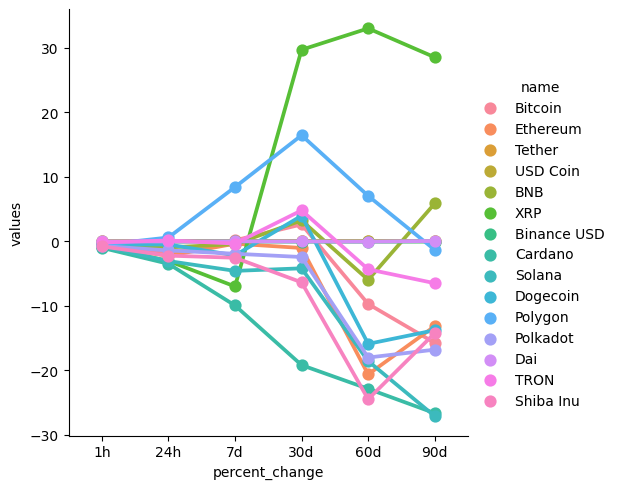

In [18]:
sns.catplot(x='percent_change', y='values', hue='name', data = df4, kind = 'point')
plt.show()

In [19]:
df5 = df2[['name', 'quote.USD.price', 'Timestamp']]
df5
df5.query("name == 'Bitcoin'")

,name,quote.USD.price,Timestamp
0,Bitcoin,19079.31676,2022-10-13 06:54:19.327938
15,Bitcoin,19080.26496,2022-10-13 06:55:19.743155
30,Bitcoin,19186.36964,2022-10-19 11:20:30.827528
45,Bitcoin,19177.67837,2022-10-19 11:21:17.259983
60,Bitcoin,19177.67837,2022-10-19 11:21:27.644457
75,Bitcoin,19178.55887,2022-10-19 11:23:05.283167
90,Bitcoin,19175.38669,2022-10-19 11:23:18.666262


<AxesSubplot: xlabel='Timestamp', ylabel='quote.USD.price'>

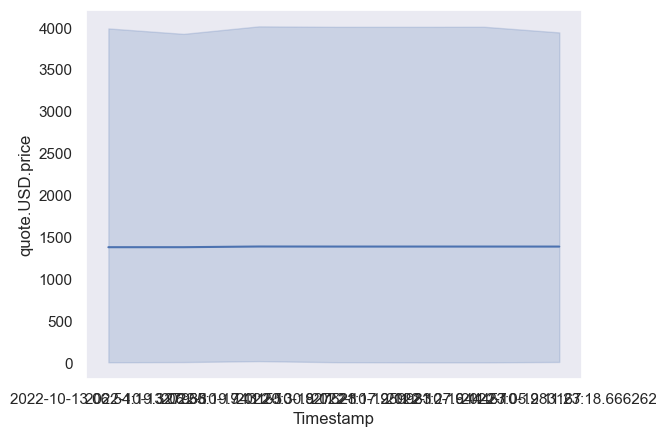

In [20]:
sns.set_theme(style="dark")
sns.lineplot(x='Timestamp', y='quote.USD.price', data = df5)